<a href="https://colab.research.google.com/github/marcos626/control_systems_Ogata/blob/master/05_Testing_Second_Order_Behaviour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to Control in Python
#### author: Juan M. Acevedo-Valle
#### date: 13/Mar/2018
## Second order system response

In [ ]:
%matplotlib inline
# Import libraries we will be using in this session
import control
from control import tf
import matplotlib
import numpy as np
import pylab as plt
matplotlib.rcParams['figure.figsize'] = (8.0,6.0)
matplotlib.rcParams.update({'font.size': 12, 'font.weight': 'bold'})

In [ ]:
#Input the system to be tested
G_cl=tf([375],[1,34,375])
print(G_cl)


       375
----------------
s^2 + 34 s + 375



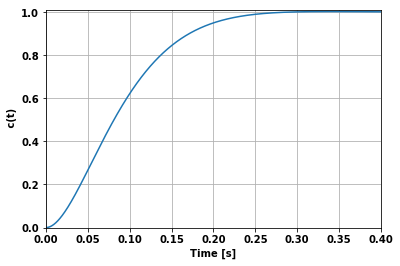

In [ ]:
#Obtain the response to be analyzed
T = np.linspace(0,0.4,num=1000000)
T, y_step = control.step_response(G_cl, T)
plt.plot(T,y_step)
plt.xlabel('Time [s]',weight='bold')
plt.ylabel(' c(t)',weight='bold')
plt.xlim(0,max(T))
plt.ylim([0,1.01])
plt.grid(True)

In [ ]:
#Check Rise time
tr = T[np.where(y_step>1)][0]
print(tr)

0.2849166849166849


In [ ]:
#Check Peak Time
tp = T[np.argmax(y_step)]
print(tp)

0.3387667387667388


In [ ]:
#Check Mp
Mp = np.max(y_step)-1
print(Mp)

0.0031541601265605568


In [ ]:
#Check settling time
set_low = list(np.where(y_step>0.95)[0])
set_high = list(np.where(y_step<1.05)[0])
ts=0

try:
    for i in range(0,-len(T),-1):
        if set_low[i] is not set_high[i]:
            ts = T[i+1]
            continue
except:
    if len(set_low)>len(set_high):
        ts=T[set_low[i+1]]
    else:
        ts=T[set_high[i+1]]
print(ts)

0.19952419952419953


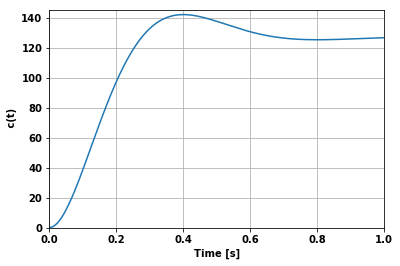

In [ ]:
G = tf([89.96256],[1,10.666,89.96256])
T = np.linspace(0,1,num=1000)
T,y_step = control.step_response(G,T)
y_step = 127 * y_step
plt.plot(T,y_step)
plt.xlabel('Time [s]',weight='bold')
plt.ylabel(' c(t)',weight='bold')
plt.xlim([0,1])
plt.ylim([0,145])
plt.grid(True)

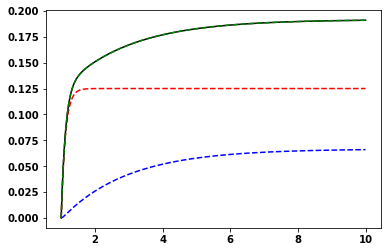

In [ ]:
# Response of system as a result of a system decomposition
#High order systems
#Fot the system Gt =
#       s^2 + 31 s + 23
# --------------------------
# s^3 + 38 s^2 + 255 s + 120
G1=tf([1],[1,30,15])
G2=tf([1],[1,8])
Gt = control.parallel(G1,G2)
T=np.linspace(1,10,num=1000)
T, y_G1 = control.step_response(G1,T)
T, y_G2 = control.step_response(G2,T)
T, y_Gt = control.step_response(Gt,T)
plt.plot(T,y_G1,'--b')
plt.plot(T,y_G2,'--r')
plt.plot(T,y_Gt,'k')
plt.plot(T,y_G1+y_G2,'--g')